In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import os

In [23]:
df_GrowthCurve_allData = pd.read_csv('GrowthCurve_allData.csv') #rename and delte some cols
df_control_growth_curves = pd.read_csv('Control_growthcurves.csv') #nothing to change but NO PLATE INFO
df_Enamine_DR_growthCurves=pd.read_csv('Enamine_DR_growthcurves.csv')
df_Enamine_t6_t12_wells=pd.read_csv('Enamine_t6_t12_wells.csv')
df_Enamine_t6_t12_controls=pd.read_csv('Enamine_t6_t12_ctrls.csv')

## df_GrowthCurve_allData

In [24]:
df_GrowthCurve_allData = pd.read_csv('GrowthCurve_allData.csv') #rename and delte some cols
df_GrowthCurve_allData = df_GrowthCurve_allData.drop(columns=['row','column','endOD',
       'maxOD', 'maxOD.t', 'expAcc', 'lag', 'statAcc', 'stat', 'maxR',
       'maxR.t', 'minR', 'minR.t', 'Function', 'Structure_class_1',
       'Structure_class_2', 'Target.1']) 

df_GrowthCurve_allData = df_GrowthCurve_allData.rename(columns={'ProductName': 'Compound','Plate':'Plate_ID', 'MIC':'Control_Label'})

df_GrowthCurve_allData["Control_Label"] = df_GrowthCurve_allData["Control_Label"].apply(
       lambda x: 1 if x in ['Cipro', 'Fosfo'] else (-1 if x == 'DMSO' else 0)
)

df_GrowthCurve_allData

,Well,Plate_ID,Concentration,Compound,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Control_Label,Smiles
0,A01,546,0.2,DMSO,0.0,0.281996,0.570499,0.763557,0.872017,0.965293,1.041215,-1,NaN
1,A02,546,0.2,DMSO,0.0,0.288503,0.613883,0.778742,0.889371,0.978308,1.062907,-1,NaN
2,A03,546,0.2,Polyoxyethylene stearate,0.0,0.286334,0.587852,0.765727,0.889371,0.982646,1.043384,0,O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10]
3,A04,546,0.2,Lefamulin (acetate),0.0,0.262473,0.559653,0.737527,0.863341,0.950108,1.008677,0,CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...
4,A05,546,0.2,Cefodizime (sodium),0.0,0.275488,0.924078,0.676790,0.685466,0.668113,0.672451,0,O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18427,P20,S10,7.9,DMSO,0.0,0.187970,0.511278,0.736842,0.857143,0.924812,0.989975,-1,NaN
18428,P21,S10,7.9,DMSO,0.0,0.185464,0.491228,0.736842,0.867168,0.937343,1.002506,-1,NaN
18429,P22,S10,7.9,DMSO,0.0,0.187970,0.506266,0.741855,0.874687,0.942356,1.012531,-1,NaN
18430,P23,S10,7.9,DMSO,0.0,0.197995,0.523810,0.761905,0.877193,0.932331,0.997494,-1,NaN


In [25]:
timepoints = sorted([c for c in df_GrowthCurve_allData.columns if c.startswith('t_')],
                    key=lambda s: float(s.split('_')[1]))

df_GrowthCurve_allData = df_GrowthCurve_allData.melt(
        id_vars=['Well', 'Plate_ID', 'Concentration',
               'Compound','Control_Label', 'Smiles'],
        value_vars=timepoints,
        var_name='Timepoint',
        value_name='OD'
    )

df_GrowthCurve_allData

,Well,Plate_ID,Concentration,Compound,Control_Label,Smiles,Timepoint,OD
0,A01,546,0.2,DMSO,-1,NaN,t_0,0.000000
1,A02,546,0.2,DMSO,-1,NaN,t_0,0.000000
2,A03,546,0.2,Polyoxyethylene stearate,0,O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10],t_0,0.000000
3,A04,546,0.2,Lefamulin (acetate),0,CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...,t_0,0.000000
4,A05,546,0.2,Cefodizime (sodium),0,O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...,t_0,0.000000
...,...,...,...,...,...,...,...,...
129019,P20,S10,7.9,DMSO,-1,NaN,t_12.48,0.989975
129020,P21,S10,7.9,DMSO,-1,NaN,t_12.48,1.002506
129021,P22,S10,7.9,DMSO,-1,NaN,t_12.48,1.012531
129022,P23,S10,7.9,DMSO,-1,NaN,t_12.48,0.997494


## df_Enamine_t6_t12_wells/controls

In [5]:
df_Enamine_t6_t12_wells=pd.read_csv('Enamine_t6_t12_wells.csv')
df_Enamine_t6_t12_controls=pd.read_csv('Enamine_t6_t12_ctrls.csv')
df_Enamine_t6_t12_controls = df_Enamine_t6_t12_controls.drop(columns=['Unnamed: 0'], errors='ignore')


In [6]:
print(df_Enamine_t6_t12_controls['Replicate'].unique())
print(df_Enamine_t6_t12_wells['Replicate'].unique())

df_Enamine_t6_t12_controls

['OD_A' 'OD_C']
['OD_A' 'OD_C']


,Well,Replicate,Compound,t_0,t_6,t_12,Smiles,Plate_ID,Concentration
0,A01,OD_A,DMSO,0.000000,0.584807,1.150336,NaN,1886318-Y12-A081,50
1,A02,OD_A,Ciprofloxacin,0.003213,0.003213,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1886318-Y12-A081,50
2,A23,OD_A,DMSO,0.000000,0.552675,1.098924,NaN,1886318-Y12-A081,50
3,A24,OD_A,DMSO,0.000000,0.552675,1.111777,NaN,1886318-Y12-A081,50
4,B01,OD_A,DMSO,0.000000,0.607300,1.137483,NaN,1886318-Y12-A081,50
...,...,...,...,...,...,...,...,...,...
12795,O24,OD_C,DMSO,0.000000,0.604127,1.090567,NaN,1886318-Y12-A100,50
12796,P01,OD_C,DMSO,0.000000,0.708738,1.205639,NaN,1886318-Y12-A100,50
12797,P02,OD_C,DMSO,0.000000,0.632895,1.085337,NaN,1886318-Y12-A100,50
12798,P23,OD_C,Ciprofloxacin,0.000000,0.005231,0.002615,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1886318-Y12-A100,50


In [7]:
df_Enamine_t6_t12_wells=df_Enamine_t6_t12_wells.rename(columns={'t_6': 't_6.24','t_12':'t_12.48'})
df_Enamine_t6_t12_controls=df_Enamine_t6_t12_controls.rename(columns={'t_6': 't_6.24','t_12':'t_12.48'})


df_Enamine_t6_t12_wells['Concentration'] = 50
df_Enamine_t6_t12_controls['Concentration'] = 50

df_Enamine_t6_t12_wells['Control_Label'] = 0


df_Enamine_t6_t12_controls['Control_Label'] = df_Enamine_t6_t12_controls["Compound"].apply(
    lambda x: 1 if x == 'Ciprofloxacin' else -1
)
df_Enamine_t6_t12_wells=df_Enamine_t6_t12_wells.drop(columns=['Activity'])


In [8]:
df_Enamine=pd.concat([df_Enamine_t6_t12_controls,df_Enamine_t6_t12_wells], ignore_index=True)

timepoints = sorted([c for c in df_Enamine.columns if c.startswith('t_')],
                    key=lambda s: float(s.split('_')[1]))

df_Enamine = df_Enamine.melt(
        id_vars=['Well', 'Plate_ID', 'Concentration',
               'Compound','Replicate','Control_Label', 'Smiles'],
        value_vars=timepoints,
        var_name='Timepoint',
        value_name='OD'
    )

df_Enamine

,Well,Plate_ID,Concentration,Compound,Replicate,Control_Label,Smiles,Timepoint,OD
0,A01,1886318-Y12-A081,50,DMSO,OD_A,-1,NaN,t_0,0.000000
1,A02,1886318-Y12-A081,50,Ciprofloxacin,OD_A,1,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,t_0,0.003213
2,A23,1886318-Y12-A081,50,DMSO,OD_A,-1,NaN,t_0,0.000000
3,A24,1886318-Y12-A081,50,DMSO,OD_A,-1,NaN,t_0,0.000000
4,B01,1886318-Y12-A081,50,DMSO,OD_A,-1,NaN,t_0,0.000000
...,...,...,...,...,...,...,...,...,...
230395,M05,1886318-Y12-A100,50,Z3342561431,OD_C,0,CC1(C)CN(CC1CN)C=2N=C(N=C3CCCC32)C=4C=CN=CC4,t_12.48,0.920575
230396,H15,1886318-Y12-A100,50,Z1459426305,OD_C,0,CC(C)CCC1CCCCN1C(=O)C2=CSC(CN)=N2,t_12.48,1.019955
230397,A05,1886318-Y12-A100,50,Z6191966153,OD_C,0,CN1CCOC=2C=CC(=CC12)C(=O)NCC=3C=CC=NC3CN,t_12.48,1.035647
230398,N17,1886318-Y12-A100,50,Z2396635673,OD_C,0,CC1CC(CN1C(=O)NC=2C=C(C)C=C(CN)C2)C=3C=CC(C)=CC3,t_12.48,0.993802


# Functions

In [26]:

def plot_hist_od_distributions(df, concentration, max_density, save_path=False):
    #timepoints = ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
    timepoints = ['t_0', 't_6.24','t_12.48']
    labels = [-1, 0, 1]
    colors = { -1: '#1f77b4', 0: '#ff7f0e', 1: '#2ca02c' }
    label_names = {-1: "Negative Control", 0: "Test Compound", 1: "Positive Control"}

    # Filter the data based on the given concentration
    df_sub = df[df['Concentration'] == concentration]
    
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    axes = axes.flatten()

    for i, time in enumerate(timepoints):
        ax = axes[i]
        # Plot histograms for each control label group
        for label in labels:
            subset = df_sub[df_sub['Control_Label'] == label]
            ax.hist(
                subset[time],
                bins=30,
                alpha=0.3,
                density=True,
                label=label_names[label],  # Use descriptive label names
                color=colors[label],
                histtype='stepfilled',
                edgecolor='black',
                linewidth=0.7
            )
        # Calculate median and MAD for Test Compounds at the current timepoint (Control_Label == 0)
        #test_subset = df_sub[df_sub['Control_Label'] == 0]
        test_subset = df_sub[df_sub['Control_Label'] != 1]

        median_val = test_subset[time].median()
        mad_val = np.median(np.abs(test_subset[time].dropna() - median_val))
        print(f'{concentration} median_val - 2 * mad_val: {median_val - 2 * mad_val}')
        
        # Plot vertical lines for the median and median minus 1, 2, and 3 MAD.
        # Label the lines only on the first subplot to avoid duplicate entries in the legend.
        if i == 0:
            ax.axvline(median_val, color='black', linestyle='--', linewidth=1.5, label='Test Compound Median')
            ax.axvline(median_val - mad_val, color='red', linestyle=':', linewidth=1.5, label='Median - 1*MAD')
            ax.axvline(median_val - 2 * mad_val, color='orange', linestyle=':', linewidth=1.5, label='Median - 2*MAD')
            ax.axvline(median_val - 3 * mad_val, color='green', linestyle=':', linewidth=1.5, label='Median - 3*MAD')
        else:
            ax.axvline(median_val, color='black', linestyle='--', linewidth=1.5)
            ax.axvline(median_val - mad_val, color='red', linestyle=':', linewidth=1.5)
            ax.axvline(median_val - 2 * mad_val, color='orange', linestyle=':', linewidth=1.5)
            ax.axvline(median_val - 3 * mad_val, color='green', linestyle=':', linewidth=1.5)
        
        ax.set_title(f'{time}')
        ax.set_xlabel('OD')
        ax.set_ylabel('Density')
        ax.grid(True, linestyle='--', alpha=0.5)
        
        # Set the y-axis limit to ensure consistency across subplots
        ax.set_ylim(0, max_density)

    # Remove any extra subplots
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    # Get handles and update the legend based on the descriptive labels and added vertical lines
    handles, legend_labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, legend_labels, loc='upper right', title='Control_Label')
    
    fig.suptitle(f'OD Distributions at Concentration {concentration} (Histograms) for df_GrowthCurve_Alldata', fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])

    if save_path:
        plt.savefig(f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/df_Enamine_t6_t12/corrected_OD_dist/corrected_OD__dist_{concentration}.png')
    else:
        plt.show()

In [27]:
def label_inactives_actives(df_long,dataset,mad_multiplier: int = 4):

    '''
    timepoints = sorted([c for c in df_wide.columns if c.startswith('t_')],
                    key=lambda s: float(s.split('_')[1]))


    if dataset=='df_GrowthCurve_allData':
        id_vars = ['Well', 'Plate_ID', 'Concentration',
               'Compound','Control_Label', 'Smiles']

    else:
        id_vars = ['Well', 'Plate_ID', 'Concentration',
               'Compound', 'Replicate','Control_Label', 'Smiles']

    

    df_long = df_wide.melt(
        id_vars=id_vars,
        value_vars=timepoints,
        var_name='Timepoint',
        value_name='OD'
    )
    '''

    # --------------------------------------------------------------------------
    # 2. median & MAD on DMSO (negative controls only)
    # --------------------------------------------------------------------------
    dmso = df_long[df_long['Control_Label'] == -1]

    group_stats = (
        dmso
        .groupby(['Plate_ID', 'Concentration', 'Timepoint'])['OD']
        .agg(
            dmso_median='median',
            dmso_mad=lambda x: 1.4826 * np.median(np.abs(x - np.median(x)))
        )
        .reset_index()
    )
    group_stats['threshold'] = (
        group_stats['dmso_median'] - mad_multiplier * group_stats['dmso_mad']
    )

    # --------------------------------------------------------------------------
    # 3. merge thresholds back and flag actives
    # --------------------------------------------------------------------------
    comb_df = df_long.merge(
        group_stats[['Plate_ID', 'Concentration', 'Timepoint', 'threshold']],
        on=['Plate_ID', 'Concentration', 'Timepoint'],
        how='left'
    )

    #comb_df['is_Active'] = (comb_df['OD'] < comb_df['threshold']).astype(int)

    comb_df['is_below_thresh'] = comb_df['OD'] < comb_df['threshold']

    if 'Replicate' in comb_df.columns:
        group_keys = ['Plate_ID', 'Concentration', 'Timepoint', 'Compound']
        comb_df['is_Active'] = (
            comb_df
            .groupby(group_keys)['is_below_thresh']
            .transform('all')          # True only if every replicate is True
            .astype(int)
        )
    else:
        comb_df['is_Active'] = comb_df['is_below_thresh'].astype(int)

    return comb_df, group_stats

In [28]:
def plot_sample_counts_per_well(
    df,
    well_col: str = 'Well',
    rows: list[str] = None,
    cols: list[int] = None,
    figsize: tuple[int,int] = (12, 6),
    title: str = 'Sample Counts per Well',
    cmap: str = 'viridis'
):

    # defaults for full 16×24 plate
    if rows is None:
        rows = [chr(c) for c in range(ord('A'), ord('P')+1)]
    if cols is None:
        cols = list(range(1, 25))

    # build the count matrix
    counts = df[well_col].value_counts()
    mat = np.zeros((len(rows), len(cols)), dtype=int)
    for i, r in enumerate(rows):
        for j, c in enumerate(cols):
            well = f"{r}{c:02d}"
            mat[i, j] = counts.get(well, 0)

    # plot
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(mat, origin='upper', aspect='equal', cmap=cmap)
    max_val = mat.max()

    # annotate with counts
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            color = 'white' if mat[i, j] > max_val/2 else 'black'
            ax.text(j, i, mat[i, j], ha='center', va='center', color=color)

    # axis labels
    ax.set_xticks(np.arange(len(cols)))
    ax.set_xticklabels(cols)
    ax.set_yticks(np.arange(len(rows)))
    ax.set_yticklabels(rows)
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    ax.set_title(title)

    # colorbar
    fig.colorbar(cax, ax=ax, label='Count')
    plt.tight_layout()
    plt.show

In [29]:
def augment_specific_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    - For column '02', duplicate rows I–P into A–H (A02 ← P02, B02 ← O02, … H02 ← I02).
    - For column '23', duplicate rows A–H into I–P (P23 ← A23, O23 ← B23, … I23 ← H23).
    """
    rows = [chr(c) for c in range(ord('A'), ord('P')+1)]
    
    # A<->P, B<->O, …, H<->I
    sym_map = { r: rows[-1-i] for i, r in enumerate(rows) }
    print(sym_map)
    to_append = []

    # 1) Column '02': copy I–P rows into A–H
    for r in rows[:8]:               # A,B,C,D,E,F,G,H
        src_well = f"{sym_map[r]}02" # P02, O02, …, I02
        tgt_well = f"{r}02"          # A02, B02, …, H02
        chunk = df[df['Well'] == src_well].copy()
        if not chunk.empty:
            chunk['Well'] = tgt_well
            to_append.append(chunk)

    # 2) Column '23': copy A–H rows into I–P
    for r in rows[:8]:               # A,B,C,D,E,F,G,H
        src_well = f"{r}23"          # A23, B23, …, H23
        tgt_well = f"{sym_map[r]}23" # P23, O23, …, I23
        chunk = df[df['Well'] == src_well].copy()
        if not chunk.empty:
            chunk['Well'] = tgt_well
            to_append.append(chunk)

    # 3) Concatenate back onto the original
    if to_append:
        df = pd.concat([df, *to_append], ignore_index=True)
    return df

In [30]:
def plot_aggregated_heatmaps_long(
    correct_uncorrect,
    dataset,
    df_long,
    timepoint,
    vmin=None,
    vmax=None,
    max_cols=3,
    cmap='viridis',
    figsize_per_subplot=(5, 4),
    save_path=False,
):
    """
    Aggregates median OD values at a given timepoint across all plates,
    then plots one heatmap per concentration using long-format DataFrame.
    Removed DMSO overlay.
    """
    concs = sorted(df_long['Concentration'].dropna().unique())

    if vmin is None or vmax is None:
        all_medians = []

        for conc in concs:
            sub = df_long[
                (df_long['Concentration'] == conc) &
                (df_long['Timepoint']     == timepoint)
            ]
            # median OD per well for this concentration
            med_vals = (
                sub.groupby('Well')['OD']
                   .median()
                   .values                     # numpy array of medians
            )
            all_medians.extend(med_vals)

        all_medians = np.array(all_medians, dtype=float)

        if vmin is None:
            vmin = np.nanmin(all_medians)
        if vmax is None:
            vmax = np.nanmax(all_medians)

    
    n = len(concs)
    ncols = min(max_cols, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(
        nrows, ncols,
        figsize=(figsize_per_subplot[0] * ncols, figsize_per_subplot[1] * nrows),
        constrained_layout=True
    )
    axes = np.atleast_1d(axes).flatten()

    for ax, conc in zip(axes, concs):
        sub = df_long[
            (df_long['Concentration'] == conc) &
            (df_long['Timepoint'] == timepoint)
        ]

        # compute median OD per well
        med = sub.groupby('Well')['OD'].median().reset_index(name='MedianOD')
        med['Row'] = med['Well'].str[0]
        med['Col'] = med['Well'].str[1:].astype(int)
        heatmap_data = med.pivot(index='Row', columns='Col', values='MedianOD')

        # draw heatmap
        im = sns.heatmap(
            heatmap_data,
            ax=ax,
            cmap=cmap,
            vmin=vmin,
            vmax=vmax,
            cbar=False,
            square=True
        )

        # annotate number of plates
        num_plates = sub['Plate_ID'].nunique()
        ax.set_title(f'{conc} µM ({num_plates} plates)')
        ax.set_xlabel('Col')
        ax.set_ylabel('Row')

    # turn off unused subplots
    for ax in axes[len(concs):]:
        ax.axis('off')

    # shared colorbar
    mappable = axes[0].collections[0]
    fig.colorbar(
        mappable,
        ax=axes.tolist(),
        orientation='vertical',
        fraction=0.02,
        pad=0.04,
        label=f'OD @ {timepoint}'
    )

    plt.suptitle(f'{dataset} {correct_uncorrect}: Median @ {timepoint}', y=1.02)
    
    if save_path:
        plt.savefig(f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/{dataset}/{correct_uncorrect}_OD_dist/{correct_uncorrect}_heatmap_{timepoint}.png')

    else:
        plt.show()

In [31]:
def correct_well_batch_effect_time(df_long):

    #Inactive compounds
    inactive = df_long[df_long['is_Active'] == 0]

    #Per-spot median (Well, Timepoint)
    well_medians = (
        inactive
        .groupby(['Well','Timepoint'])['OD']
        .median()
        .reset_index(name='well_meds')
    )


    #Global median per Timepoint
    global_medians = (
        inactive
        .groupby(['Timepoint'])['OD']
        .median()
        .reset_index(name='global_meds')
    )

    df = df_long.merge(well_medians, on=['Well','Timepoint'], how='left')
    df = df.merge(global_medians, on=['Timepoint'], how='left')

    #batch‐corrected OD
    mask = df['Timepoint'] != 't_0'
    df.loc[mask, 'OD'] = (
        df.loc[mask, 'OD'] 
        / df.loc[mask, 'well_meds'] 
       * df.loc[mask, 'global_meds']
    )
    
    df = df.drop(columns=['well_meds', 'global_meds'])

    return df, global_medians, well_medians

def correct_well_batch_effect_time_conc(df_long):

    #Inactive compounds
    inactive = df_long[df_long['is_Active'] == 0]

    #Per-spot median (Well, Timepoint)
    well_medians = (
        inactive
        .groupby(['Well','Timepoint','Concentration'])['OD']
        .median()
        .reset_index(name='well_meds')
    )


    #Global median per Timepoint
    global_medians = (
        inactive
        .groupby(['Timepoint', 'Concentration'])['OD']
        .median()
        .reset_index(name='global_meds')
    )

    df = df_long.merge(well_medians, on=['Well','Timepoint','Concentration'], how='left')
    df = df.merge(global_medians, on=['Timepoint','Concentration'], how='left')

    #batch‐corrected OD
    mask = df['Timepoint'] != 't_0'
    df.loc[mask, 'OD'] = (
        df.loc[mask, 'OD'] 
        / df.loc[mask, 'well_meds'] 
       * df.loc[mask, 'global_meds']
    )
    
    df = df.drop(columns=['well_meds', 'global_meds'])

    return df, global_medians, well_medians

In [32]:
def correct_plate_batch_effect_t12(
    df: pd.DataFrame,
) -> pd.DataFrame:

    # 1) Compute median OD of negative controls on each plate at timepoint t_12.48
    neg_ctrl = df[(df['Control_Label'] == -1) & (df['Timepoint'] == 't_12.48')]
    plate_ctrl_meds = (
        neg_ctrl
        .groupby('Plate_ID')['OD']
        .median()
        .reset_index(name='plate_ctrl_med')
    )

    # 2) Merge back onto full DataFrame
    df_norm = df.merge(plate_ctrl_meds, on='Plate_ID', how='left')

    # 3) Normalize
    df_norm['OD'] = df_norm['OD'] / df_norm['plate_ctrl_med']

    # 4) Clean up
    df_norm = df_norm.drop(columns=['plate_ctrl_med'])

    return df_norm

def correct_plate_batch_effect_relative(df: pd.DataFrame) -> pd.DataFrame:

    
    neg_ctrl = df[df['Control_Label'] == -1]
    plate_ctrl_meds = (
        neg_ctrl
        .groupby(['Plate_ID', 'Timepoint'])['OD']
        .median()
        .reset_index(name='plate_ctrl_med')
    )

    
    df_norm = df.merge(plate_ctrl_meds, on=['Plate_ID', 'Timepoint'], how='left')

    
    denom = df_norm['plate_ctrl_med'].to_numpy()

    # where the median is > 0, perform the division; else write 0
    df_norm['OD'] = np.where(
        (denom > 0) & np.isfinite(denom),
        df_norm['OD'] / denom,
        0.0
    )

    # 4. clean up and return
    df_norm.drop(columns=['plate_ctrl_med'], inplace=True)
    return df_norm

In [33]:
def plot_hist_od_distributions_long(
    title,
    correct_uncorrect,
    dataset,
    df_long,
    bins,                       
    concentration,
    max_density,
    max_x,
    time_col='Timepoint',
    od_col='OD',
    conc_col='Concentration',
    control_label_col='Control_Label',
    plot_pos_ctrls: bool = True, 
    save_path: bool = False,
):
    """
    Plot overlaid OD histograms by Control_Label at each timepoint,
    allowing a different `bins` specification for each label.
    """
    # ── helper to fetch per-label bins ───────────────────────────────────────────
    def _bins_for(label):
        # if user gave one global spec => just echo it back
        if not isinstance(bins, dict):
            return bins
        # else fall back to a reasonable default (e.g. 30) if key missing
        return bins.get(label, 30)

    # timepoints in chronological order
    timepoints = sorted(
        df_long[time_col].dropna().unique(),
        key=lambda s: float(s.split('_')[1])
    )
    print(f"Timepoints: {timepoints}")

    base_labels= [-1, 0, 1]
    labels = base_labels if plot_pos_ctrls else [-1, 0]
    colors       = {-1:'#1f77b4', 0:'#ff7f0e', 1:'#2ca02c'}
    label_names  = {-1:"Negative Control", 0:"Test Compound", 1:"Positive Control"}

    df_sub = df_long[df_long[conc_col] == concentration]

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, tp in enumerate(timepoints):
        ax     = axes[i]
        sub_tp = df_sub[df_sub[time_col] == tp]

        for lab in labels:
            grp = sub_tp[sub_tp[control_label_col] == lab]
            ax.hist(
                grp[od_col],
                bins=_bins_for(lab),        # ← per-label bins
                alpha=0.30,
                density=True,
                label=label_names[lab],
                color=colors[lab],
                histtype='stepfilled',
                edgecolor='black',
                linewidth=0.7
            )

        # reference lines computed on negatives only
        test_grp = sub_tp[sub_tp[control_label_col] == -1]
        med = test_grp[od_col].median()
        mad = 1.4826*np.median(np.abs(test_grp[od_col].dropna() - med))

        ax.text(
            0.98, 0.95,                         # x, y in Axes coords (0–1)
            f"MAD = {mad:.5f}",                 # formatted value
            transform=ax.transAxes,
            ha="right", va="top",
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.25", fc="w", ec="0.7", alpha=0.7)
        )


        if i == 0:
            ax.axvline(med,            color='black', linestyle='--', linewidth=1.5, label='Median')
            ax.axvline(med - mad,      color='red',   linestyle=':',  linewidth=1.5, label='-1 MAD')
            ax.axvline(med - 2*mad,    color='orange',linestyle=':',  linewidth=1.5, label='-2 MAD')
            ax.axvline(med - 3*mad,    color='green', linestyle=':',  linewidth=1.5, label='-3 MAD')
            ax.axvline(med - 4*mad,    color='blue', linestyle=':',  linewidth=1.5, label='-4 MAD')

        else:
            for k, col in enumerate(['black','red','orange','green','blue']):
                ax.axvline(med - k*mad,
                           color=col,
                           linestyle='--' if k==0 else ':',
                           linewidth=1.5)

        ax.set_title(tp)
        ax.set_xlabel('OD')
        ax.set_ylabel('Density')
        ax.set_ylim(0, max_density)
        ax.set_xlim(0, max_x)
        ax.grid(True, linestyle='--', alpha=0.5)

    # strip unused panels
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    handles, labels_ = axes[0].get_legend_handles_labels()

    fig.legend(handles, labels_, loc='lower right', title='Control_Label')
    fig.suptitle(f'OD Distributions at {concentration} µM with {title}', fontsize=16)
    plt.tight_layout(rect=[0,0,0.95,0.95])
    if save_path:
        plt.savefig(f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/{dataset}/{correct_uncorrect}_OD_dist/Well_OD_distribution_conc_{concentration}.png')
    else:
        plt.show()
    

In [34]:
def plot_plate_median_distributions(
    df_long: pd.DataFrame,
    title: str,
    dataset: str,
    bins,
    concentration: float,
    max_density: float,
    max_x: float,
    save_path: bool = False,
):

    plate_meds = (
        df_long
          .groupby(['Plate_ID', 'Concentration', 'Timepoint'], as_index=False)['OD']
          .median()
          .rename(columns={'OD': 'OD_plate_med'})
    )

    # 2) filter to the chosen concentration
    df_sub = plate_meds[plate_meds['Concentration'] == concentration]

    # 3) bin lookup helper
    def _bins_for(tp):
        return bins.get(tp, 30) if isinstance(bins, dict) else bins

    # 4) sort timepoints numerically (expects 't_<value>' format)
    timepoints = sorted(
        df_sub['Timepoint'].dropna().unique(),
        key=lambda s: float(s.split('_')[1])
    )

    # 5) build the 2×4 panel grid
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, tp in enumerate(timepoints):
        ax = axes[i]
        vals = df_sub[df_sub['Timepoint'] == tp]['OD_plate_med']

        ax.hist(
            vals,
            bins=_bins_for(tp),
            alpha=0.7,
            density=True,
            histtype='stepfilled',
            edgecolor='black',
            linewidth=0.7
        )

        ax.set_title(tp)
        ax.set_xlabel('Plate-median OD')
        ax.set_ylabel('Density')
        ax.set_xlim(0, max_x)
        ax.set_ylim(0, max_density)
        ax.grid(True, linestyle='--', alpha=0.5)

    # remove any unused subplots
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(
        f'Plate-median OD Distributions at {concentration} µM — {title}',
        fontsize=16
    )
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])

    if save_path:
        out_dir = f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/{dataset}'
        os.makedirs(out_dir, exist_ok=True)
        out_file = f'{out_dir}/plate_median_hist_conc_{concentration}.png'
        plt.savefig(out_file)
    else:
        plt.show()


# GrowthCurve processing

In [35]:
df_GrowthCurve = df_GrowthCurve_allData.copy()
df_GrowthCurve.columns

Index(['Well', 'Plate_ID', 'Concentration', 'Compound', 'Control_Label',
       'Smiles', 'Timepoint', 'OD'],
      dtype='object')

Replciates D and E come from dataset df_Enamine_DR_growthCurves

Replicates 1 to 6 come from df_control_growth_curves

Replciates OD_A and OD_C come from t6_t12_controls and t6_t12_wells

## Add active/inactive label based on -4*MAD threshold on DMSO per plate

In [36]:
df_GrowthCurve,_=label_inactives_actives(df_GrowthCurve, dataset='df_GrowthCurve_allData',mad_multiplier=4)

In [37]:
df_GrowthCurve['is_Active'].sum()

6714

## Row and Column Batch effect

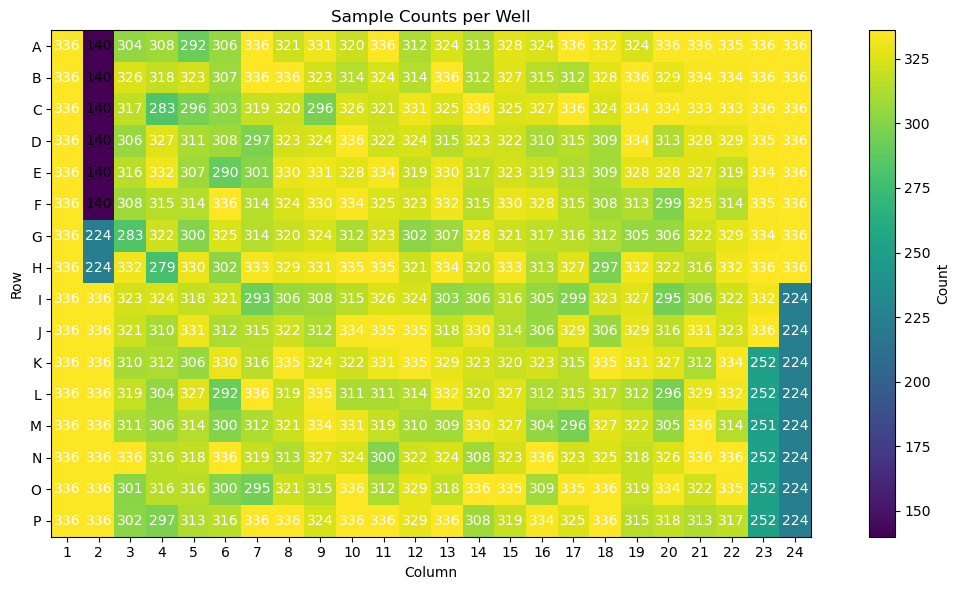

In [38]:
mask_actives_pos_controls = (df_GrowthCurve['is_Active'] == 1) | (df_GrowthCurve['Control_Label'] == 1)

# Keep only the rows you’re not removing
df_GrowthCurve_no_actives_pos = df_GrowthCurve.loc[~mask_actives_pos_controls].reset_index(drop=True)

plot_sample_counts_per_well(df_GrowthCurve_no_actives_pos)


In [39]:

df_GrowthCurve_well_corrected_time_conc,global_medians,well_medians = correct_well_batch_effect_time_conc(df_GrowthCurve)

df_GrowthCurve_well_corrected_time,global_medians,well_medians = correct_well_batch_effect_time(df_GrowthCurve)


In [ ]:
mask_actives_pos_controls = (df_GrowthCurve_well_corrected_time_conc['is_Active'] == 1) | (df_GrowthCurve_well_corrected_time_conc['Control_Label'] == 1)

df_GrowthCurve_well_corrected_time_conc_no_active_pos = df_GrowthCurve_well_corrected_time_conc.loc[~mask_actives_pos_controls].reset_index(drop=True)

# Investigate

In [58]:
from string import ascii_uppercase
from typing import List

def wells_for_column(col: int, max_rows: int = 16) -> List[str]:
    """
    Return the list of well IDs in column `col` (1–24) on a plate with rows A–(A+max_rows−1).
    
    Parameters
    ----------
    col : int
        Column number, 1 through 24.
    max_rows : int
        Number of rows (defaults to 16 for rows A–P).
    
    Returns
    -------
    List[str]
        Well identifiers like ['A02', 'B02', ..., 'P02'] for col=2.
    
    Raises
    ------
    ValueError
        If col is not in 1..24 or if max_rows > 26.
    """
    if not (1 <= col <= 24):
        raise ValueError("Column must be between 1 and 24.")
    if not (1 <= max_rows <= 26):
        raise ValueError("max_rows must be between 1 and 26.")

    # Rows are the first `max_rows` letters of the alphabet
    rows = ascii_uppercase[:max_rows]  # 'A', 'B', ..., up to P if max_rows=16
    col_str = f"{col:02d}"              # zero-padded, e.g. '02'

    return [f"{row}{col_str}" for row in rows]


In [63]:
#wells_column_2 = wells_for_column(2)

wells_column_2 = [
    'A02','B02','C02','D02','E02','F02','G02','H02',
    'I02','J02','K02','L02','M02','N02','O02','P02'
]

df=df_GrowthCurve_well_corrected_time_conc_no_active_pos.copy()

df=df[(df['Timepoint'] == 't_2.08') & (df['Concentration'] == 1.2)]

df_subset = df[df['Well'].isin(wells_column_2)]

df_subset.groupby('Well')['OD'].describe()[['count','50%']]


,count,50%
Well,,
A02,5.0,0.242008
B02,5.0,0.248065
C02,5.0,0.225418
D02,5.0,0.227092
E02,5.0,0.178451
F02,5.0,0.186107
G02,8.0,0.162893
H02,8.0,0.163557
I02,12.0,0.177278


In [61]:
print(wells_column_2)

['A02', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'H02', 'I02', 'J02', 'K02', 'L02', 'M02', 'N02', 'O02', 'P02']
